<a href="https://colab.research.google.com/github/jamesmattluyon/CpE-AIML/blob/main/58034_LabNo_04_BrenanAndFriends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 2: Multiple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

# Part 1
Create a class named `MultipleLinearRegression()` wherein it can compute for the linear regression for multiple variables. The class will be required to have the following helper methods:
> 1. `correlations(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: A vector that contains the covariances of each feature to the target. 
> 3. `train(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: the weights of the linear regressor. Use least squares method for this part. If the training fails due to the singularity of the matrix, raise a custom error pertaining to autocorrelation.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should only accept vectors.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication. Do not forget to pad the matrix for the bias term.
> 5. `evaluate()`
>> input: *none*
>>
>> output: a `DataFrame` that displays the SST, SSR, SSE, MSE, RMSE, R-squared, and the Adjusted R-squared. Note: You should use the `predict()` method here.
> 5. `visualize(testX, testY)`
>> input: the dataset training sets and their ground truths.
>>
>> output: a visualization of the linear regressor over the testing dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## No other packages or libraries can be added in this cell

In [ ]:
### YOUR CODE HERE
### YOUR CODE HERE
class MultipleLinearRegression():

  def correlations(self, X, y):
    x1, x2 = X.iloc[::,0].values, X.iloc[::,1].values
    X0, X1, Y = x1 - x1.mean(), x2 - x2.mean(), y - y.mean()
    cov0, cov1 = np.mean(X0 * Y), np.mean(X1 * Y)
    std_x1, std_x2, std_y = np.std(x1), np.std(x2), np.std(y)
    corr0, corr1 = cov0 / (std_x1 * std_y), cov1 / (std_x2 * std_y)
    return np.round(np.array([corr1,corr0]),2)

  def train(self, X, y):
    X = np.array(np.c_[np.ones((len(X), 1)), X])
    self.theta = np.linalg.inv(X.T @ X) @ X.T @ y_train
    self.model_ = np.array([self.theta[1],self.theta[2],self.theta[0]]).reshape(-1,1)
    return self.model_

  def passed_value(self, x):
    index = self.theta[0]
    value = self.theta[1:]
    for i, j in zip(x, value): index += (i*j)
    return index

  def predict(self, x):
    self.predictions = []
    for val in x.values:
      self.predictions.append(self.passed_value(val))
    return np.round(np.array(self.predictions).reshape(-1,1),2)

  def evaluate(self):
    y_hat = self.predict(X_train)
    y = y_train.to_numpy()
    SST = np.sum(np.square(y-y.mean()))
    SSR = np.sum(np.square(y_hat-y.mean()))
    SSE = np.sum(np.square(y_hat-y))
    MSE = np.mean(np.square(y_hat-y))
    RMSE = np.sqrt(MSE)
    R2 = 1-SSE/SST
    ADJ_R2 = 1-(1-((1-R2)*(len(y)-1)/(len(y)-len(X)-1)))  
    dataframe = {
        'Measures of Error and Variability of the Dataset':
        ['SST', 'SSR', 'SSE', 'MSE', 'RMSE', 'R2', 'ADJ R2'],
        'Range':[SST,SSR,SSE,MSE,RMSE,R2,ADJ_R2]
                 }
    df = pd.DataFrame(dataframe)
    return df


  def visualize(self, testX, testY):
    X = pd.read_csv("real_estate_price_size_year.csv") 
    y = X['price']
    X = X.drop('price', axis=1)
    X = X.drop('year', axis=1)
    preds = self.predict(testX)
    plt.figure(figsize=(5,5)) 
    plt.scatter(X,y, color='green')
    plt.grid()
    plt.title('Multiple Regression Graph')
    plt.ylabel('Predictions')
    plt.xlabel('Ground Truth')
    plt.savefig('MultipleRegressor', bbox_inches='tight', dpi=400)
    return plt.show()   

     

In [ ]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL
### Data can be retrieved from the git repo
X = pd.read_csv("/content/real_estate_price_size_year.csv") 
y = X['price']
X = X.drop('price', axis=1)
X_train, X_test = X.iloc[0:95], X.iloc[95:]
y_train, y_test = y.iloc[0:95], y.iloc[95:]

In [ ]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = MultipleLinearRegression()

In [ ]:
## TEST #2 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
R = regressor.correlations(X,y)
R

array([0.09, 0.86])

Expected output value:
$$R = \begin{bmatrix}0.09 & 0.86\end{bmatrix}$$

In [ ]:
## TEST #3 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X_train,y_train)
regressor.model_

array([[ 2.32557432e+02],
       [ 3.01009349e+03],
       [-5.96417503e+06]])

Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_2 \\ \omega_0\end{bmatrix} = \begin{bmatrix}232.56\\ 3010.09 \\ -5964175.03\end{bmatrix}$$

In [ ]:
## TEST #4 (Max pts: 35)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test)
preds

array([[210962.87],
       [324367.17],
       [424013.31],
       [251928.01],
       [238092.94]])

Expected output value:
$$\hat{y}_i = \begin{bmatrix} 210962.87 \\ 324367.17 \\ 424013.31 \\ 251928.01 \\ 238092.94 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [ ]:
# TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

,Measures of Error and Variability of the Dataset,Range
0,SST,5.726848e+11
1,SSR,4.467124e+11
2,SSE,9.684273e+13
3,MSE,1.073050e+10
4,RMSE,1.035881e+05
5,R2,-1.681030e+02
6,ADJ R2,-2.649281e+03


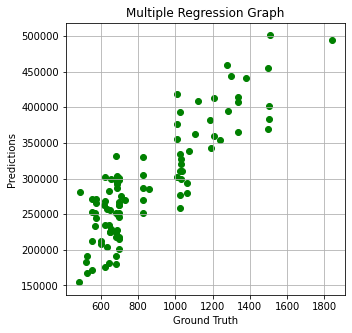

In [ ]:
## TEST #6 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize(X_test, y_test)

# Part 2
## 2.1 Lecture Requirement

Obtain a dataset of your liking from a data source. Explain the purpose of the dataset and mention any publication if it is obtained from the source. Provide a needs statement and significance for the dataset.



The chosen dataset provides information regarding the trades from the cryptocurrency, Bitcoin, Ethereum, and Binance. The said datasets show information regarding the amount the cryptocurrency when it was opened and closed, the high and lows, trade volumes, and as well as trade count.

The dataset is important or significant for traders who are investing in the said cryptocurrencies and as well as to those who wants to learn more about trading. The dataset can be a reference for the traders to predict what the movement of the market will be. This will give them a premonition on when will they buy and sell their investments.

Dataset Source: https://www.cryptodatadownload.com/



## 2.2 Lab Requirement

Perform data exploration, data cleaning, and data visualization. The dataset should contain targets either for regression or classification. Provide the correlation and measures of error and variability of the dataset.

In [ ]:
import pandas as pd
def get_filename(from_symbol, to_symbol, exchange, datetime_interval):
    return '%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval)
def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    df.datetime = pd.to_datetime(df.date) # change to datetime
    df = df.set_index('date') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df

In [ ]:
df_btc = read_dataset(get_filename('BTC', 'USD', 'Binance', 'Daily'))
df_eth = read_dataset(get_filename('ETH', 'USD', 'Binance', 'Daily'))
df_bnb = read_dataset(get_filename('BNB', 'USD', 'Binance', 'Daily'))
df_btc.head()

Reading data from BTC_USD_Binance_Daily.csv
(1550, 8)
Reading data from ETH_USD_Binance_Daily.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



(1550, 8)
Reading data from BNB_USD_Binance_Daily.csv
(1426, 8)


,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
date,,,,,,,,
1/1/2018 0:00,BTC/USDT,13715.65,13818.55,12750.00,13380.00,8609.915844,1.147997e+08,105595.0
1/1/2019 0:00,BTC/USDT,3701.23,3810.16,3642.00,3797.14,23741.687030,8.814925e+07,154227.0
1/1/2020 0:00,BTC/USDT,7195.24,7255.00,7175.15,7200.85,16792.388170,1.212145e+08,194010.0
1/1/2021 0:00,BTC/USDT,28923.63,29600.00,28624.57,29331.69,54182.925010,1.582527e+09,1314910.0
1/10/2018 0:00,BTC/USDT,14401.00,14955.66,13131.31,14907.09,17411.001660,2.440114e+08,161476.0


##Data Exploration and Data Cleaning

In [ ]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1550 entries, 1/1/2018 0:00 to 9/9/2021 0:00
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1550 non-null   object 
 1   open         1550 non-null   float64
 2   high         1550 non-null   float64
 3   low          1550 non-null   float64
 4   close        1550 non-null   float64
 5   Volume BTC   1550 non-null   float64
 6   Volume USDT  1550 non-null   float64
 7   tradecount   1426 non-null   float64
dtypes: float64(7), object(1)
memory usage: 109.0+ KB


In [ ]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1550 entries, 1/1/2018 0:00 to 9/9/2021 0:00
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1550 non-null   object 
 1   open         1550 non-null   float64
 2   high         1550 non-null   float64
 3   low          1550 non-null   float64
 4   close        1550 non-null   float64
 5   Volume BTC   1550 non-null   float64
 6   Volume USDT  1550 non-null   float64
 7   tradecount   1426 non-null   float64
dtypes: float64(7), object(1)
memory usage: 109.0+ KB


In [ ]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1550 entries, 1/1/2018 0:00 to 9/9/2021 0:00
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1550 non-null   object 
 1   open         1550 non-null   float64
 2   high         1550 non-null   float64
 3   low          1550 non-null   float64
 4   close        1550 non-null   float64
 5   Volume BTC   1550 non-null   float64
 6   Volume USDT  1550 non-null   float64
 7   tradecount   1426 non-null   float64
dtypes: float64(7), object(1)
memory usage: 109.0+ KB


In [ ]:
checknull = pd.DataFrame({'BTC': df_btc.isnull().sum(),
                          'ETH': df_eth.isnull().sum(),
                          'BNB': df_bnb.isnull().sum()})
checknull

,BTC,ETH,BNB
Volume BNB,NaN,NaN,0.0
Volume BTC,0.0,NaN,NaN
Volume ETH,NaN,0.0,NaN
Volume USDT,0.0,0.0,0.0
close,0.0,0.0,0.0
high,0.0,0.0,0.0
low,0.0,0.0,0.0
open,0.0,0.0,0.0
symbol,0.0,0.0,0.0
tradecount,124.0,124.0,0.0


####Since there are null values in the three dataset, they need to be cleaned and filled with values.

In [ ]:
fillnull =df_btc.fillna(0) 
btc = fillnull
btc.isnull().sum()

symbol         0
open           0
high           0
low            0
close          0
Volume BTC     0
Volume USDT    0
tradecount     0
dtype: int64

In [ ]:
fillnull =df_eth.fillna(0) 
eth = fillnull
eth.isnull().sum()

symbol         0
open           0
high           0
low            0
close          0
Volume ETH     0
Volume USDT    0
tradecount     0
dtype: int64

In [ ]:
fillnull =df_bnb.fillna(0) 
bnb = fillnull
bnb.isnull().sum()

symbol         0
open           0
high           0
low            0
close          0
Volume BNB     0
Volume USDT    0
tradecount     0
dtype: int64

#### As checked, there are no null values anymore in the three datasets.

In [ ]:
checkcol = pd.DataFrame({'BTC': btc.columns,
                   'ETH': eth.columns,
                   'BNB': bnb.columns})
checkcol

,BTC,ETH,BNB
0,symbol,symbol,symbol
1,open,open,open
2,high,high,high
3,low,low,low
4,close,close,close
5,Volume BTC,Volume ETH,Volume BNB
6,Volume USDT,Volume USDT,Volume USDT
7,tradecount,tradecount,tradecount


####Upon inspecting, the"date" column is not listed in the dataset. To fix it, the index should be reset to have the "date" column 

In [ ]:
btc.reset_index(inplace=True)
btc.columns

Index(['date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USDT', 'tradecount'],
      dtype='object')

In [ ]:
eth.reset_index(inplace=True)
eth.columns

Index(['date', 'symbol', 'open', 'high', 'low', 'close', 'Volume ETH',
       'Volume USDT', 'tradecount'],
      dtype='object')

In [ ]:
bnb.reset_index(inplace=True)
bnb.columns

Index(['date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BNB',
       'Volume USDT', 'tradecount'],
      dtype='object')

#### After resetting their indices, the dataframes now have the "date" column which are needed when visualizing data.

In [ ]:
bnb.head()

,date,symbol,open,high,low,close,Volume BNB,Volume USDT,tradecount
0,1/1/2018 0:00,BNB/USDT,8.5478,8.7000,7.8000,8.4500,654338.840,5.400588e+06,20279
1,1/1/2019 0:00,BNB/USDT,6.1139,6.1228,5.7735,5.9910,1412914.180,8.379612e+06,22331
2,1/1/2020 0:00,BNB/USDT,13.7159,13.8692,13.6500,13.7184,940625.040,1.295062e+07,27635
3,1/1/2021 0:00,BNB/USDT,37.3596,38.9590,36.9555,37.7762,2435989.127,9.235861e+07,287020
4,1/10/2018 0:00,BNB/USDT,17.3992,17.5554,14.6004,17.5000,1172651.150,1.878944e+07,42308


In [ ]:
bnb.shape

(1426, 9)

In [ ]:
btc.shape

(1550, 9)

In [ ]:
eth.shape

(1550, 9)

##Data Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go


In [ ]:
x = btc.tail(800)["date"]
y = btc["close"]
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y))
# Set title
fig.update_layout(
    title_text="Time series plot of Bitcoin Close Price",
)

The graph above shows the amount of bitcoin when the prices closed at a specific date and time. The maximum amount is almost at 67,5oo on July 13, 2021 and the lowest at around 3000 on July 20, 2019.

In [ ]:
x = eth.tail(800)["date"]
y = eth["close"]
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y))
# Set title
fig.update_layout(
    title_text="Time series plot of Ethereum Close Price",
)

The graph above shows the prices of Ethereum, which is another cryptocurrency, given the spefic date. The highest conversion of ethereum is also in July 13, 2021, similar to bitcoin, that garnered around 4800, with its lowest as 87 per Etherium.  


In [ ]:
x = bnb.tail(800)["date"]
y = bnb["close"]
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y))
# Set title
fig.update_layout(
    title_text="Time series plot of Binance Close Price",
)

The visualization of the graph indicates the prices of binance cryptocurrency during a specific date. Shown during the month of March 22 - April 22 is a stable movement of the price, and suddenly hits a 400 price marks which could be due to a factor resulting in the sudden increase. 

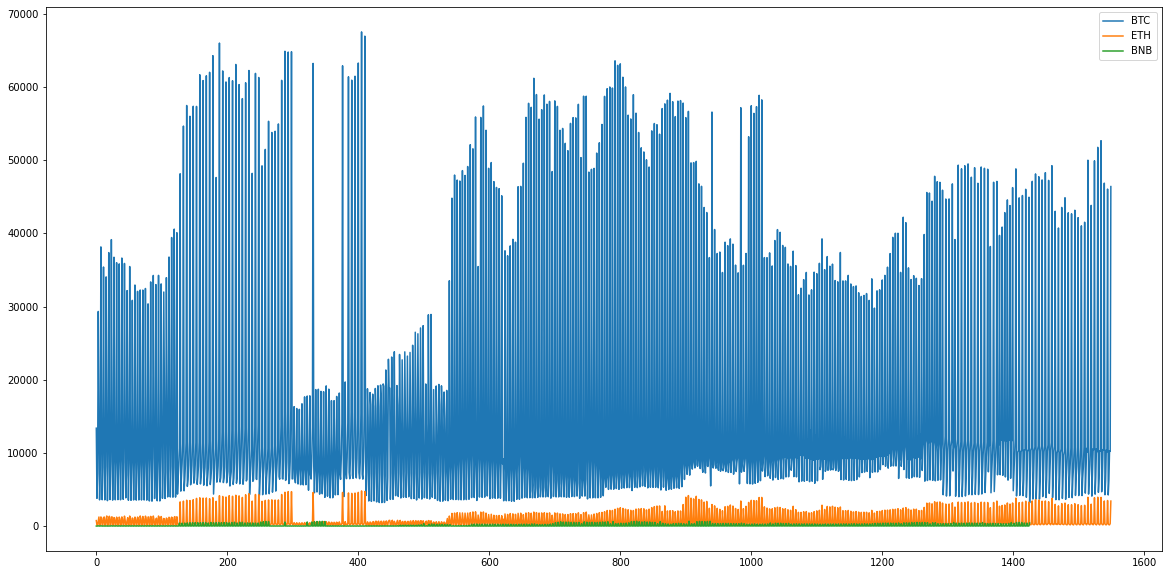

In [ ]:
df = pd.DataFrame({'BTC': btc.close,
                   'ETH': eth.close,
                   'BNB': bnb.close})
df.plot.line(figsize=(20, 10))

#### In this graph, the three tokens' absolute closing prices are graphed in one frame. It is now easier to make comparisons in one looking though it's pointless because BTC closing prices are substantially higher than ETH and BNB pricing.

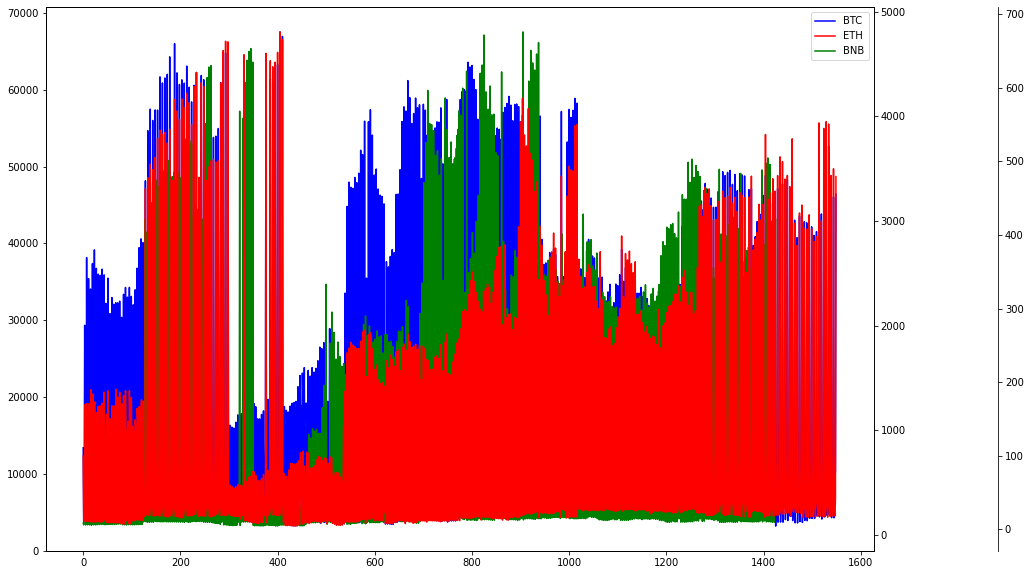

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
df['BTC'].plot(ax=ax1, style='b-')
df['ETH'].plot(ax=ax1, style='r-', secondary_y=True)
df['BNB'].plot(ax=ax2, style='g-')
# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH', 'BNB'])

The graph shows similarities on the spikes and development of the cryptocurrencies, which can then be concluded that the cryptocurrencies up and downs can affect the other cryptocurrencies given in the said dataset. 


##Correlation of Closing Prices

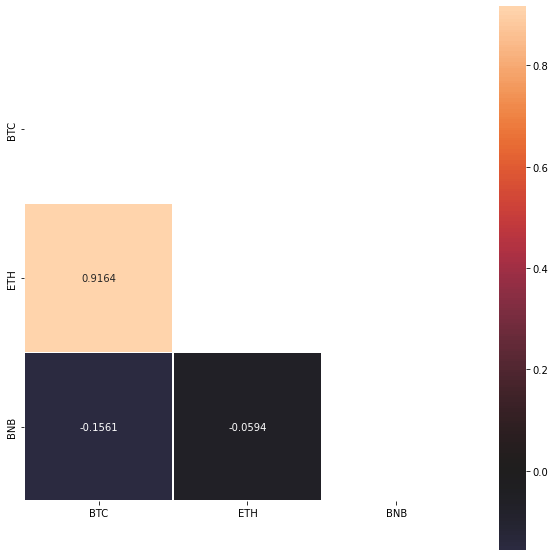

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

The plot above shows the relationship between the different cryptocurrency variables. The vertical heat scale is the basis of the corresponding correlation for each variable. The relationship between ETH and BTC has a positive linear relationship where the increase in value of one variable results in the increase in the value of the other variable as well. As for the relationship of BNB and ETH, it has the most negative linear relationship among the three since it has the darkest color based from the heat scale where the increase in value of one variable results in decrease in the value of another variable. Lastly, the relationship of BNB and BTC is a negative linear relationship as well since it has a dark shade of color as well which has the same condition with the second relationship that has been discussed.

In [ ]:
df_return = df.apply(lambda x: x / x[0])
df_return

,BTC,ETH,BNB
0,1.000000,1.000000,1.000000
1,0.283792,0.184241,0.708994
2,0.538180,0.173208,1.623479
3,2.192204,0.965456,4.470556
4,1.114132,1.651678,2.071006
...,...,...,...
1545,0.318297,0.393038,NaN
1546,0.467176,0.259354,NaN
1547,0.770039,0.239129,NaN
1548,0.763767,0.464708,NaN


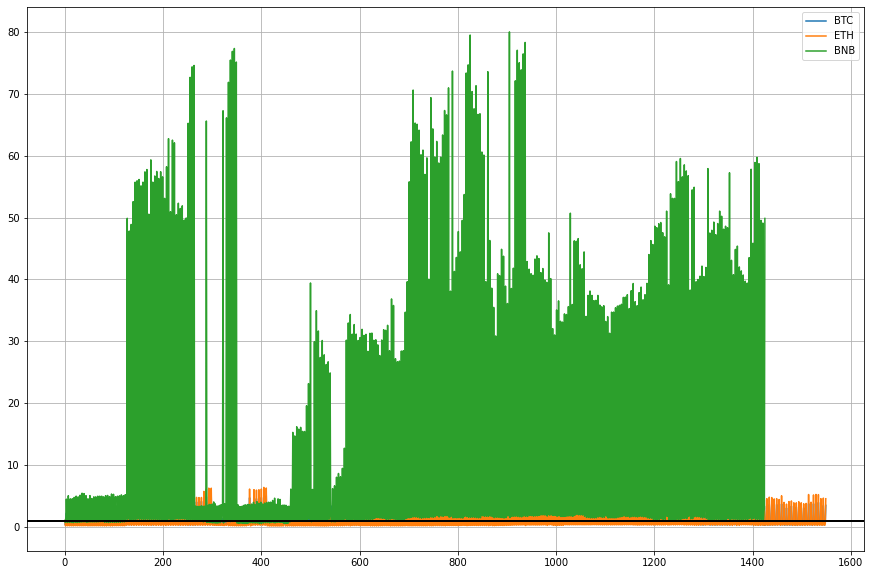

In [ ]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)

#### In this visualization, it demonstrates the buy and hold strategy in which an investor purchases a cryptocurrency and holds it for a long time, regardless of market volatility. Analyzing the graph, BNB was the most profitable in years 2017 to 2021. 

# Part 3
## 3.1 Lecture Requirement

Identify an algorithm or method in performing a machine learning activity with the dataset you have chosen. Mention any papers, publications, or white papers about the properties, use, and theory behind the method. Provide an explanation of equations representing the algorithm.



###Prophet Model
The Prophet library is a free, open-source tool for forecasting univariate time series datasets developed by Facebook. It's simple to use and designed to identify a decent set of hyperparameters for the model automatically in order to create accurate forecasts for data with trends and seasonal structure.

#### *Algorithm*


*   To use Prophet for forecasting, first create a Prophet() object and 
configure it, then execute the fit() function with the data to fit it on the dataset.
*   The Prophet() object accepts inputs to customize the model type you desire, such as growth type, seasonality type, and more. By default, the model will try its hardest to figure out nearly everything on its own.
*   A DataFrame of time series data is passed to the fit() function. The DataFrame must be formatted in a specified way. The date-times must be in the first column, which must be named 'ds.' The observations must be in the second column, which is labeled 'y.' This implies that the column names in the dataset are changed. It also necessitates the conversion of the first column to date-time objects, if not already done (for example, as part of loading the dataset using the appropriate read csv parameters).

### *Publication*
PFM is a Facebook-developed forecasting model that forecasts a desired variable with respect to time. The precision of PFM is not dependent on the precision of other prediction models, such as those used in meteorology. It takes about ten times less time to train than an ARIMA model of equivalent complexity. The model performs better at fitting data with bigger changepoints, but it loses effectiveness in predicting future trends. PFM plots a big number first, then selects the few points that will be utilized in the model using L1 regularization.

Publication Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7500321/


### *Equations*
The equation related to the Prophet for forecasting is the Prophet equation. The equation is y(t) = g(t) + s(t) + h(t) + e(t). Each addend is an essential component in order to complete the general additive model. g(t) is the trend that models non-periodic changes, s(t) is the seasonality that presents periodic changes, h(t) is the one that ties in the effects of the holidays function and lastly, e(t) covers the distinctive changes that are not accommodated by the model.



## 3.2 Lab Requirement

Present your solution implementing your algorithm of choice. You may use any library or package in this section. However, you are required to observe the following:

* Enforce object-oriented programming by implementing at least two of the pillars of OOP in the entirety of the solution.
* Dedicated functions for training, predicting, and evaluating the solution.
* A DataFrame of the metrics of the solution
* A visualization of the solution’s results.

###Binance Price Prediction
##### Since Binance was shown to be the most profitable after performing a data visualization dmeonstrating the buy and hold strategy, the group will perform price prediction of Binance using the Prophet model. 







In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

dfbnb = bnb[["date", "open"]]
new_names = {
    "date": "ds", 
    "open": "y",
}
dfbnb.rename(columns=new_names, inplace=True)

m = Prophet(
    seasonality_mode="multiplicative" 
)
m.fit(dfbnb)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
dfbnb.tail()

,ds,y
1421,9/8/2021 0:00,418.7000
1422,9/9/2018 0:00,9.5110
1423,9/9/2019 0:00,22.3747
1424,9/9/2020 0:00,23.2745
1425,9/9/2021 0:00,415.2000


####To check if the columns have been successfully renamed, the group used the tail() function. As shown, the "date" and open price column have been renamed. 

In [ ]:
futureprice = m.make_future_dataframe(periods = 365)
futureprice

,ds
0,2017-12-18
1,2017-12-19
2,2017-12-20
3,2017-12-21
4,2017-12-22
...,...
1786,2022-11-08
1787,2022-11-09
1788,2022-11-10
1789,2022-11-11


In [ ]:
forecast = m.predict(futureprice)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1786,2022-11-08,1231.722616,1148.735919,1321.055404
1787,2022-11-09,1239.124052,1155.493951,1328.745328
1788,2022-11-10,1257.332956,1170.317021,1346.262440
1789,2022-11-11,1270.595229,1185.952351,1363.312690
1790,2022-11-12,1284.422071,1199.429624,1374.749486


The predict function was utilized in the dataset by predicting the future price based from the dataset itself. The variable 'yhat' has been utilized in order to predict two future prices of each element which are the 'yhat_lower' and 'yhat_upper' where the former variable is the predicted lower price and the latter one is the predicted higher price. 

##Measures of Error and Variability

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2017-12-18,8.620615,-18.058828,24.845246,8.620615,8.620615,-0.639984,-0.639984,-0.639984,0.000239,0.000239,0.000239,-0.640223,-0.640223,-0.640223,0.0,0.0,0.0,3.103562
1,2017-12-19,8.624637,-17.520564,23.108066,8.624637,8.624637,-0.645480,-0.645480,-0.645480,0.000394,0.000394,0.000394,-0.645874,-0.645874,-0.645874,0.0,0.0,0.0,3.057609
2,2017-12-20,8.628659,-18.048038,25.100785,8.628659,8.628659,-0.653738,-0.653738,-0.653738,-0.005126,-0.005126,-0.005126,-0.648612,-0.648612,-0.648612,0.0,0.0,0.0,2.987781
3,2017-12-21,8.632681,-19.123669,25.548717,8.632681,8.632681,-0.649183,-0.649183,-0.649183,-0.000692,-0.000692,-0.000692,-0.648491,-0.648491,-0.648491,0.0,0.0,0.0,3.028494
4,2017-12-22,8.636704,-18.099494,24.284472,8.636704,8.636704,-0.644638,-0.644638,-0.644638,0.000975,0.000975,0.000975,-0.645613,-0.645613,-0.645613,0.0,0.0,0.0,3.069155


In [ ]:
metric_df= forecast.set_index('ds')[['yhat']].join(dfbnb.set_index('ds').y).reset_index()
metric_df

,ds,yhat,y
0,2017-12-18,3.103562,5.9990
1,2017-12-19,3.057609,5.9800
2,2017-12-20,2.987781,5.6900
3,2017-12-21,3.028494,5.1819
4,2017-12-22,3.069155,5.1596
...,...,...,...
1786,2022-11-08,1231.722616,NaN
1787,2022-11-09,1239.124052,NaN
1788,2022-11-10,1257.332956,NaN
1789,2022-11-11,1270.595229,NaN


In [ ]:
metric_df.dropna(inplace=True)
metric_df

,ds,yhat,y
0,2017-12-18,3.103562,5.9990
1,2017-12-19,3.057609,5.9800
2,2017-12-20,2.987781,5.6900
3,2017-12-21,3.028494,5.1819
4,2017-12-22,3.069155,5.1596
...,...,...,...
1421,2021-11-08,607.696780,649.5000
1422,2021-11-09,615.474499,653.6000
1423,2021-11-10,619.149900,635.0000
1424,2021-11-11,628.044906,614.2000


In [ ]:
metric_df['yhat'].values

array([  3.10356151,   3.05760944,   2.98778094, ..., 619.1498999 ,
       628.04490588, 634.38008754])

In [ ]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(metric_df.y, metric_df.yhat)

0.9889407954531109

In [ ]:
mean_squared_error(metric_df.y, metric_df.yhat)

271.56494632577915

In [ ]:
mean_absolute_error(metric_df.y, metric_df.yhat)

8.848566477944336

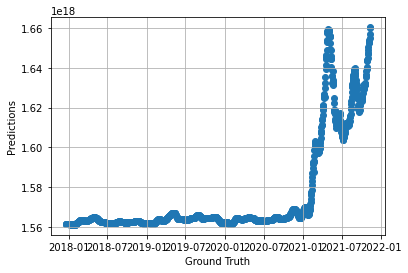

In [ ]:
y = metric_df['ds']
X = metric_df.drop('ds', axis=1)
mlr_sk = LinearRegression().fit(X,y) 
y_preds = mlr_sk.predict(X)
mlr_sk.coef_
plt.scatter(y,y_preds)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.grid()
plt.show()

In [ ]:
# X = metric_df.drop('yhat', axis=1)
# X = sm.add_constant(X)
# y = metric_df['yhat']

# mlr_sm = sm.OLS(y,X)
# mlr_results = mlr_sm.fit()
# mlr_results.summary()

###Visualization

In [ ]:
plot_plotly(m, forecast)


The graph above shows both the actual and predicted future prices based from the dataset itself. The black line and set of dots are the actual prices obtained from the imported dataset. The blue line represents the predicted future prices that is ranged from the beginning up to November 2022. The predicted future prices is accurate as the dataset where the model has trained from is close to the predicted ones. 

In [ ]:
plot_components_plotly(m, forecast)


####The model tells us that Binance will produce an upward trend for the price of Binance, BNB is lowest around December on a Friday, BNB is most cheaper around July on a Wednesday, and most expensive around November on a Friday.

In [ ]:
class LinearRegression_Simple():
  def covariance(self, vecA, vecB):
    return np.cov(vecA,vecB)[0,1]
    
  def pearsons_r(self, vecA, vecB):
    return np.corrcoef(vecA, vecB)[0,1]
  
  def train(self, X, y):
    x_train = X.T
    std_X, std_y = np.std(x_train), np.std(y)
    pearson_r = np.corrcoef(x_train,y)[0,1]
    self.w1 = pearson_r*(std_y/std_X)
    self.w0 = y.mean()-self.w1*x_train.mean()
    self.model_ = np.round((self.w1,self.w0),2).reshape(-1,1)
    return self.model_

  def predict(self, x):
    return np.round((self.w0+(self.w1*x)),2)  
  
  def evaluate3(self):
    y_hat = self.predict(X).astype(float, errors = 'raise')
    SST = np.round((np.sum(np.square(y-y.mean()))),2)
    SSR = np.round((np.sum(np.square(y_hat-y.mean()))),2)
    SSE = np.round((np.sum(np.square(y_hat-y))),2)
    MSE = np.round(np.mean(np.square(y_hat-y)),2)
    RMSE = np.round(np.sqrt(MSE),2)
    R2 = np.round(1 - (SSE/SST),2)
    adj_R2 = np.round((1-((1-R2)*(len(y)-1)/(len(y)-len(X)-1))),2) 
    dict_1 = {
    'SST': SST,
    'SSR': SSR,
    'SSE': SSE,
    'MSE': MSE,
    'RMSE': RMSE,
    'R^2': R2,
    'Adj. R^2': adj_R2
    }
    return dict_1
  
  def visualize3(self):   
    y = metric_df['yhat']
    X = metric_df.drop('yhat', axis=1)
    mlr_sk = LinearRegression().fit(X,y) 
    y_preds = mlr_sk.predict(X)
    mlr_sk.coef_
    plt.scatter(X,y)
    plt.plot(X,y_preds, color='red')
    plt.xlabel('Ground Truth')
    plt.ylabel('Predictions')
    plt.grid()
    plt.show()
    return plt.show()


In [ ]:
reg = LinearRegression_Simple()

In [ ]:
#metric_df.drop(columns=['ds'], inplace=True)
metric_df.head()

,yhat,y
0,3.103562,5.9990
1,3.057609,5.9800
2,2.987781,5.6900
3,3.028494,5.1819
4,3.069155,5.1596


In [ ]:
#metric_df.drop(columns=['ds'], inplace=True)
#metric_df= forecast.set_index('ds')[['yhat']].join(dfbnb.set_index('ds').y).reset_index()
X1 = metric_df['yhat']
y1 = metric_df['y']
X_train, X_test = X1.iloc[0:95], X1.iloc[95:]
y_train, y_test = y1.iloc[0:95], y1.iloc[95:]


In [ ]:
p = reg.pearsons_r(X1,y1)
p

0.9944881357480276

In [ ]:
c = reg.covariance(X1, y1)
c

24385.383288834157

In [ ]:
t = reg.train(X1, y1)
t

array([[1.  ],
       [1.46]])

In [ ]:
p = reg.predict(X_test[:5])
p

95    12.58
96    12.76
97    12.87
98    13.07
99    13.28
Name: yhat, dtype: float64

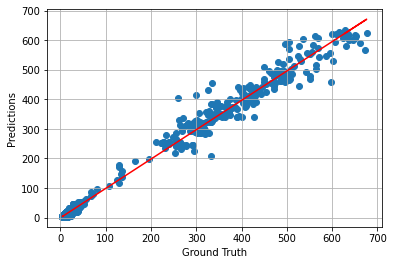

In [ ]:
reg.visualize3()

In [ ]:
X = metric_df.drop('yhat', axis=1)
X = sm.add_constant(X)
y = metric_df['yhat']

mlr_sm = sm.OLS(y,X)
mlr_results = mlr_sm.fit()
mlr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yhat   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.281e+05
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:59:22   Log-Likelihood:                -6011.9
No. Observations:                1426   AIC:                         1.203e+04
Df Residuals:                    1424   BIC:                         1.204e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4668      0.501     -0.931      0.352      -1.451       0.517
y              0.9924      0.003    357.923      0.000       0.987       0.998
==============================================================================
Omnibus:                      461.376   Durbin-Watson:                   0.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24046.173
Skew:                           0.699   Prob(JB):                         0.00
Kurtosis:                      23.069   Cond. No.                         209.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""